In [1]:
import json
import requests
import csv
import pandas as pd
import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import operator
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from pandas.tools.plotting import autocorrelation_plot

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
indicator_data = pd.read_csv('P:\\ADS\\Final\\Indicators_Cleaned.csv',header=0,parse_dates=True,index_col='Year',date_parser=dateparse, low_memory=False) 
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [3]:
indicator_data.reset_index()
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [8]:
brazil_df_ind7 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.GROW'])) &\
                                (indicator_data['CountryCode'] == 'BR')]

In [141]:
brazil_df_ind7.index

DatetimeIndex(['2016-01-01', '2015-01-01', '2014-01-01', '2013-01-01',
               '2012-01-01', '2011-01-01', '2010-01-01', '2009-01-01',
               '2008-01-01', '2007-01-01', '2006-01-01', '2005-01-01',
               '2004-01-01', '2003-01-01', '2002-01-01', '2001-01-01',
               '2000-01-01', '1999-01-01', '1998-01-01', '1997-01-01',
               '1996-01-01', '1995-01-01', '1994-01-01', '1993-01-01',
               '1992-01-01', '1991-01-01', '1990-01-01', '1989-01-01',
               '1988-01-01', '1987-01-01', '1986-01-01', '1985-01-01',
               '1984-01-01', '1983-01-01', '1982-01-01', '1981-01-01',
               '1980-01-01', '1979-01-01', '1978-01-01', '1977-01-01',
               '1976-01-01', '1975-01-01', '1974-01-01', '1973-01-01',
               '1972-01-01', '1971-01-01', '1970-01-01', '1969-01-01',
               '1968-01-01', '1967-01-01', '1966-01-01', '1965-01-01',
               '1964-01-01', '1963-01-01', '1962-01-01', '1961-01-01',
      

In [142]:
ts = brazil_df_ind7['Value'] 
ts1 = brazil_df_ind7[['Value']].copy() 
ts1.head()

,Value
Year,
2016-01-01,0.817556
2015-01-01,0.852799
2014-01-01,0.887563
2013-01-01,0.917023
2012-01-01,0.938920


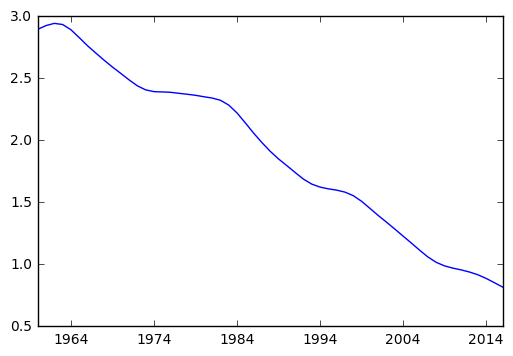

In [143]:
plt.plot(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


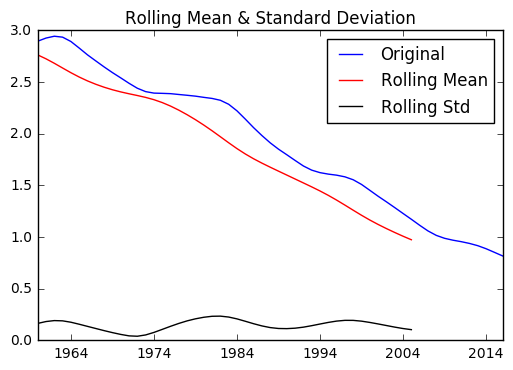

Results of Dickey-Fuller Test:
Test Statistic                 -1.715901
p-value                         0.422939
#Lags Used                     11.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


In [144]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts1.Value)

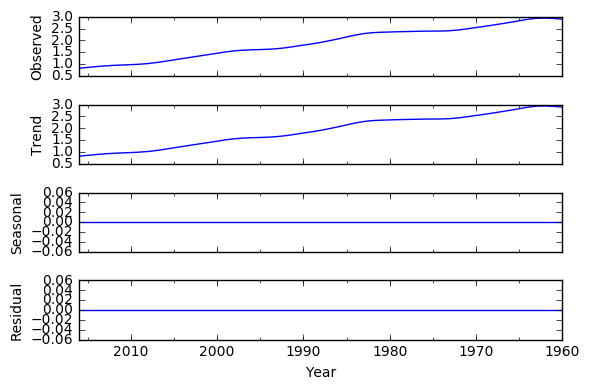

In [145]:
decomposition = sm.tsa.seasonal_decompose(ts1, model='additive')
fig = decomposition.plot()
plt.show()

## Taking Log

In [146]:
def logTransform(df):
    ts_log = np.log(df)
    plt.plot(ts_log)
    return ts_log

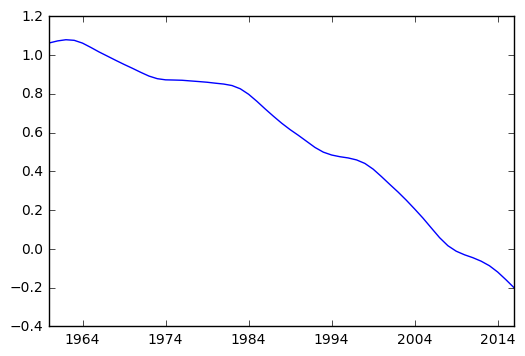

In [147]:
ts1_log = logTransform(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


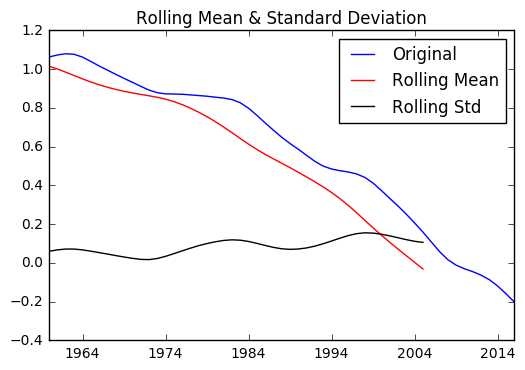

Results of Dickey-Fuller Test:
Test Statistic                 -1.283635
p-value                         0.636626
#Lags Used                     10.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [148]:
test_stationarity(ts1_log.Value)

## Log first difference 

In [149]:
def logFirstDifference(ts1_log):
    ts1_log_diff = ts1_log - ts1_log.shift()
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


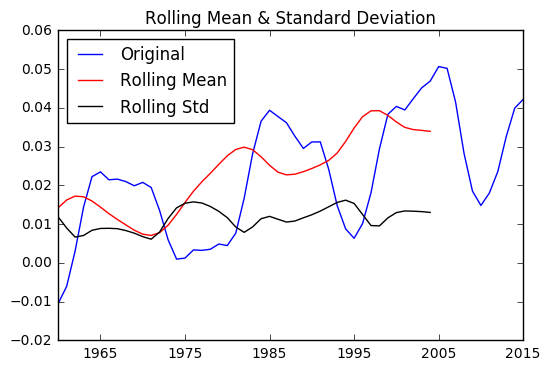

Results of Dickey-Fuller Test:
Test Statistic                 -0.505656
p-value                         0.890908
#Lags Used                     11.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [150]:
ts1_log_diff = logFirstDifference(ts1_log)
test_stationarity(ts1_log_diff.Value)

## First difference 

In [151]:
def firstDifference(df):
    #ts_first_diff = df - df.shift()
    #ts_first_diff.dropna(inplace=True)
    ts_first_diff = df.diff()
    ts_first_diff.dropna(inplace=True)
    return ts_first_diff



C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


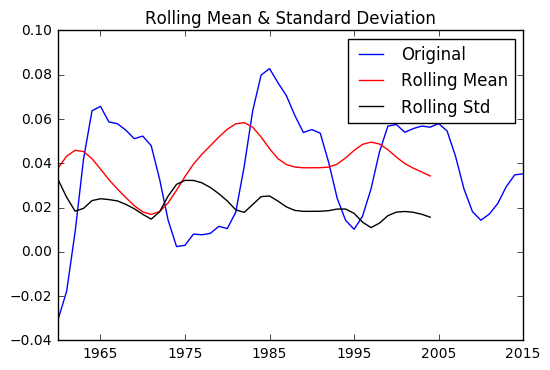

Results of Dickey-Fuller Test:
Test Statistic                 -1.417510
p-value                         0.573853
#Lags Used                     11.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [152]:
ts1_first_diff = firstDifference(ts1)
test_stationarity(ts1_first_diff.Value)

In [153]:
def expWeightedavg(ts1_log):
    expwighted_avg = pd.ewma(ts1_log, halflife=57)
    ts_log_ewma_diff = ts1_log - expwighted_avg
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(halflife=57,ignore_na=False,adjust=True,min_periods=0).mean()
  from ipykernel import kernelapp as app
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


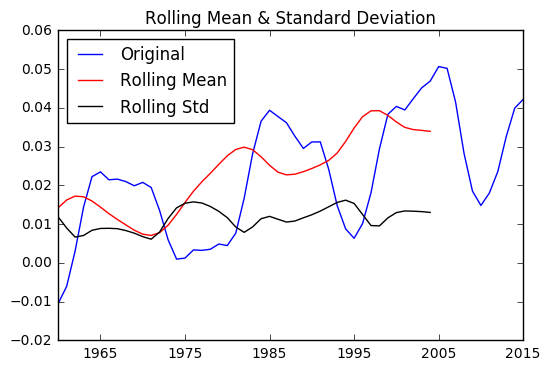

Results of Dickey-Fuller Test:
Test Statistic                 -0.505656
p-value                         0.890908
#Lags Used                     11.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [154]:
ts_log_ewma_diff = expWeightedavg(ts1_log)
test_stationarity(ts_log_ewma_diff.Value)

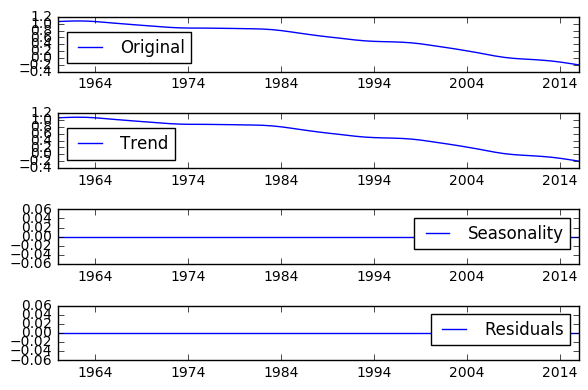

In [155]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts1_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [156]:
lag_acf = acf(ts1_log, nlags=10)
lag_pacf = pacf(ts1_log, nlags=10, method='ols')

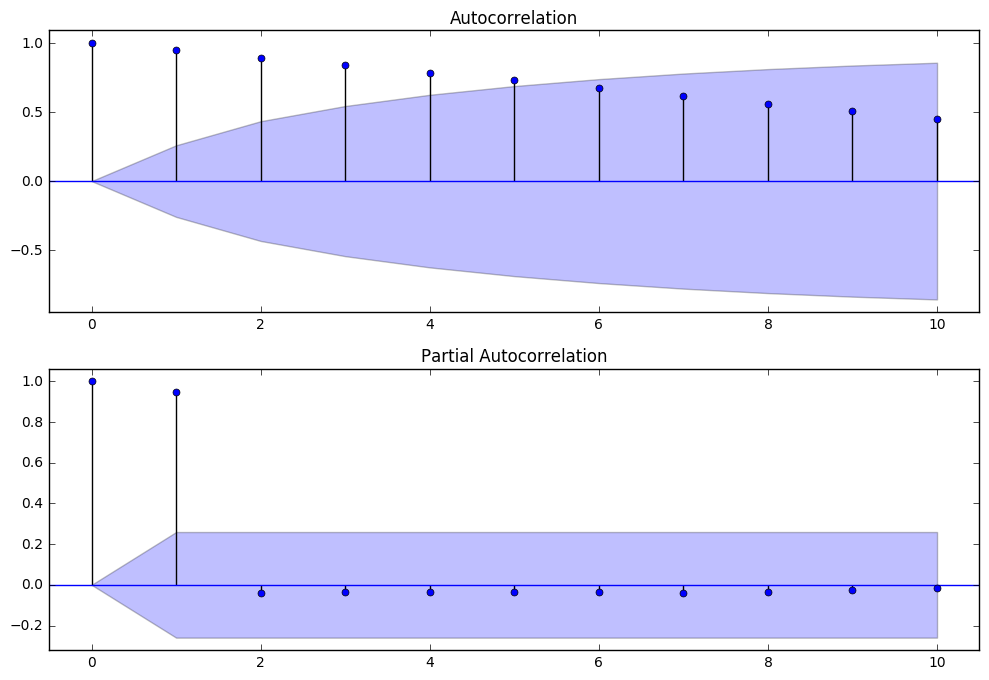

In [157]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1_log, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1_log, lags=10, ax=ax2)

- As seen from the graph above both ACF and PACF are geometric hence this is an ARMA model

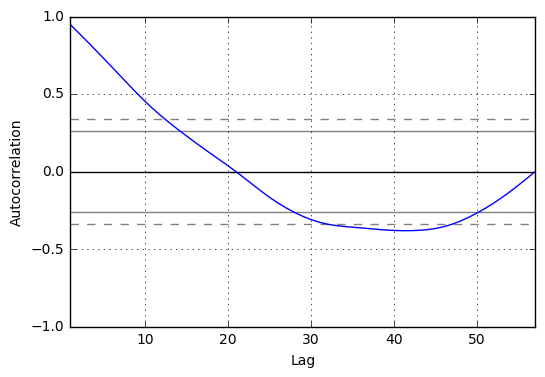

In [158]:
autocorrelation_plot(ts1_log)
plt.show()

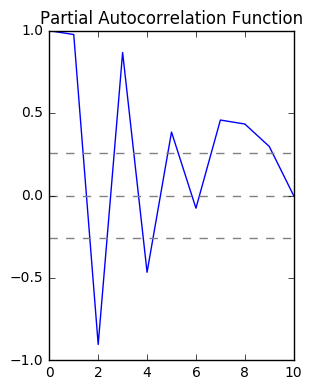

In [159]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [160]:
aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}

In [161]:
def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

In [162]:
def AR_Model(ts):
    model = ARIMA(ts, order=(2, 0, 0))
    results_AR = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2, 0, 0))',results_AR)
    print('Lag: %s' % results_AR.k_ar)
    print('Coefficients: %s' % results_AR.params)
    #print(results_AR.summary())
    predict_MA_HPI = np.exp(results_AR.predict(10, 10, dynamic=True))
    print(predict_MA_HPI)
    plt.plot(ts1_log)
    plt.plot(results_AR.fittedvalues, color='red')
    #print(np.exp(results_AR.fittedvalues))
    print(results_AR.aic)
    return results_AR

Lag: 2
Coefficients: const          0.194621
ar.L1.Value    1.979504
ar.L2.Value   -0.981531
dtype: float64
2006-01-01    1.104463
Freq: -1AS-JAN, dtype: float64
-408.6808672177508


C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


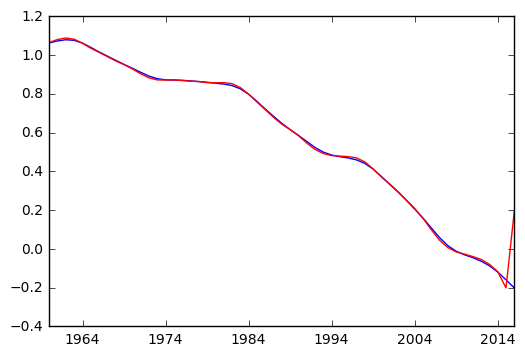

In [163]:
model_AR = AR_Model(ts1_log)

In [164]:
def MA_Model(ts):
    model = ARIMA(ts, order=(0,0, 5))
    results_MA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(0, 0, 5))',results_MA)
    print('Lag: %s' % results_MA.k_ar)
    print('Coefficients: %s' % results_MA.params)
    print(results_MA.summary())
    plt.plot(ts)
    plt.plot(results_MA.fittedvalues, color='red')
    return results_MA

Lag: 0
Coefficients: const          0.558056
ma.L1.Value    4.282656
ma.L2.Value    7.950924
ma.L3.Value    7.936254
ma.L4.Value    4.258531
ma.L5.Value    0.990539
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(0, 5)   Log Likelihood                 136.610
Method:                       css-mle   S.D. of innovations              0.017
Date:                Wed, 16 Aug 2017   AIC                           -259.219
Time:                        21:30:44   BIC                           -244.918
Sample:                    01-01-2016   HQIC                          -253.661
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           0.5581      

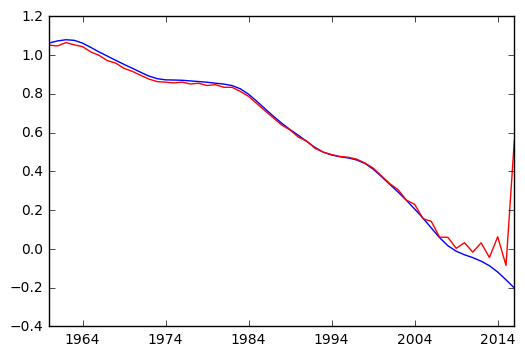

In [165]:
model_MA = MA_Model(ts1_log)

In [166]:
def Combined_Model(ts):
    model = ARIMA(ts, order=(3, 0, 0))  
    results_ARIMA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(4,0, 0))',results_ARIMA)
    print('Lag: %s' % results_ARIMA.k_ar)
    print('Coefficients: %s' % results_ARIMA.params)
    print(results_ARIMA.summary())
    plt.plot(ts)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    return results_ARIMA

Lag: 3
Coefficients: const          0.324897
ar.L1.Value    2.872604
ar.L2.Value   -2.805479
ar.L3.Value    0.931918
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(3, 0)   Log Likelihood                 230.941
Method:                       css-mle   S.D. of innovations              0.004
Date:                Wed, 16 Aug 2017   AIC                           -451.882
Time:                        21:30:47   BIC                           -441.667
Sample:                    01-01-2016   HQIC                          -447.912
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           0.3249      0.361      0.900      0.372        -0.383     1.

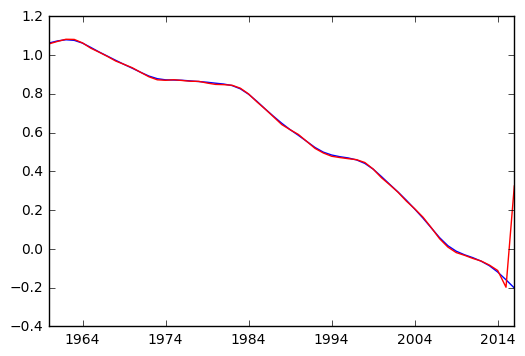

In [167]:
model_Combined = Combined_Model(ts1_log)

In [168]:
best_model =  min(aic_dict.items(),key=operator.itemgetter(1))[0]
print('Best Model is ', best_model)

Best Model is  ARIMA(ts, order=(4,0, 0))


In [169]:
aic_metric

,AIC,Modelname
0,-408.680867,"ARIMA(ts, order=(2, 0, 0))"
0,-259.219135,"ARIMA(ts, order=(0, 0, 5))"
0,-451.881888,"ARIMA(ts, order=(4,0, 0))"


In [170]:
#Forecast using Best Model
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    #output.tolist()
    output = np.exp(output)
    #out=normal(output)
    return output

In [171]:
forecast(model_AR,15)

array([ 2.86126932,  2.82281713,  2.78082187,  2.73561457,  2.68753192,
        2.63691246,  2.58409318,  2.5294063 ,  2.47317638,  2.41571778,
        2.3573324 ,  2.2983079 ,  2.2389161 ,  2.17941184,  2.12003212])

In [172]:
def FittedValues(model):
    fittedVal=model.fittedvalues
    #PredictedVal=normal(fittedVal)
    #PredictedVal= fittedVal.tolist()
    fittedVal = np.exp(fittedVal)
    print('Predicted existing values are:')
    return fittedVal
FittedValues(model_AR)

Predicted existing values are:


Year
2016-01-01    1.214850
2015-01-01    0.817887
2014-01-01    0.889507
2013-01-01    0.923651
2012-01-01    0.947429
2011-01-01    0.961424
2010-01-01    0.973564
2009-01-01    0.984972
2008-01-01    1.007027
2007-01-01    1.045922
2006-01-01    1.104463
2005-01-01    1.171127
2004-01-01    1.232441
2003-01-01    1.286754
2002-01-01    1.343847
2001-01-01    1.398084
2000-01-01    1.450115
1999-01-01    1.511111
1998-01-01    1.566973
1997-01-01    1.599701
1996-01-01    1.610847
1995-01-01    1.614522
1994-01-01    1.618813
1993-01-01    1.636965
1992-01-01    1.671114
1991-01-01    1.727738
1990-01-01    1.794889
1989-01-01    1.851639
1988-01-01    1.903965
1987-01-01    1.973208
1986-01-01    2.052785
1985-01-01    2.134983
1984-01-01    2.224152
1983-01-01    2.300477
1982-01-01    2.346782
1981-01-01    2.359541
1980-01-01    2.356646
1979-01-01    2.359808
1978-01-01    2.372293
1977-01-01    2.377510
1976-01-01    2.384577
1975-01-01    2.392877
1974-01-01    2.390879
1973-0

In [71]:
def normal(predictions_ARIMA_diff):
    #predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    predictions_ARIMA_diff_cumsum = np.cumsum(np.concatenate((ts1.values[0], predictions_ARIMA_diff)))
    print('normalized')
    #predictions_ARIMA_diff_cumsum=np.absolute(predictions_ARIMA_diff_cumsum)
    return predictions_ARIMA_diff_cumsum